# Research Example

## Obtain data

In [13]:
from quantrocket import get_prices

prices = get_prices("usstock-free-1d", start_date="2018-01-01",
                    fields=["Open","High","Low","Close", "Volume"],
                    universes="usstock-free-active"
                   )
prices.head()

Sid               FIBBG000B9XRY4  FIBBG000BKZB36  FIBBG000BMHYD1  \
Field Date                                                         
Close 2018-01-02         41.0184        168.1023        122.7749   
      2018-01-03         41.0113        168.9784        123.9478   
      2018-01-04         41.2018        170.3195        123.9389   
      2018-01-05         41.6709        172.0986        124.9618   
      2018-01-08         41.5161        171.6873        125.1206   

Sid               FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Field Date                                                        
Close 2018-01-02         81.1685         65.8918         54.7839  
      2018-01-03         81.5463         67.1859         54.1186  
      2018-01-04         82.2640         67.2789         54.3172  
      2018-01-05         83.2839         67.2247         53.7115  
      2018-01-08         83.3689         67.5269         54.6151

In [14]:
closes = prices.loc["Close"]
closes.head()

Sid,FIBBG000B9XRY4,FIBBG000BKZB36,FIBBG000BMHYD1,FIBBG000BPH459,FIBBG000GZQ728,FIBBG00B3T3HD3
Date,,,,,,
2018-01-02,41.0184,168.1023,122.7749,81.1685,65.8918,54.7839
2018-01-03,41.0113,168.9784,123.9478,81.5463,67.1859,54.1186
2018-01-04,41.2018,170.3195,123.9389,82.2640,67.2789,54.3172
2018-01-05,41.6709,172.0986,124.9618,83.2839,67.2247,53.7115
2018-01-08,41.5161,171.6873,125.1206,83.3689,67.5269,54.6151


## Overnight Returns

In [285]:
opens = prices.loc["Open"]
prior_closes = closes.shift()

overnight_returns = (opens - prior_closes) / prior_closes

In [286]:
overnight_returns.drop(index=overnight_returns.index[0], 
        axis=0, 
        inplace=True)

overnight_returns.head()

Sid,FIBBG000B9XRY4,FIBBG000BKZB36,FIBBG000BMHYD1,FIBBG000BPH459,FIBBG000GZQ728,FIBBG00B3T3HD3
Date,,,,,,
2018-01-03,0.001568,-0.000159,0.000934,0.001222,0.001530,-0.004531
2018-01-04,0.001800,0.004550,-0.000783,0.002779,0.001039,0.005688
2018-01-05,0.002369,0.002205,0.000996,0.006314,-0.000806,-0.000913
2018-01-08,-0.003715,-0.004052,-0.000070,0.000113,-0.000577,-0.002404
2018-01-09,0.001147,0.003437,0.003382,0.004191,-0.002295,0.000000


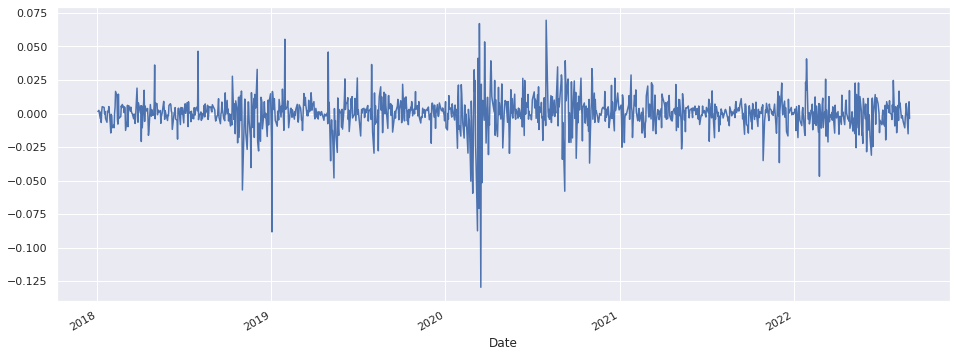

In [287]:
overnight_returns['FIBBG000B9XRY4'].plot()

# Overnight Returns Mean and Standard Deviation

In [288]:
overnight_returns = overnight_returns.describe().T[['mean', 'std']]
overnight_returns

,mean,std
Sid,,
FIBBG000B9XRY4,0.000359,0.013195
FIBBG000BKZB36,0.000095,0.010421
FIBBG000BMHYD1,0.000329,0.007579
FIBBG000BPH459,0.000927,0.011249
FIBBG000GZQ728,0.000714,0.014080
FIBBG00B3T3HD3,0.000909,0.021553
